In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketingcampaign/marketing_campaign.csv


# Customer Personality Analysis 

********This Notebook is based on "Marketing Campaign Dataset"

# Table of Content

* Problem statement 
* Discription of the dataset
* Import the required Libaries
* Import the dataset
* Exploring the dataset
>1. EDA based on the Eduation Status
>2. EDA based on the numbers of kids 
>3. EDA based on the Marital status
>4. EDA based on how diverse the age group of the customers
>5. EDA based on how correlated the Income and Number of kids at home
>6. EDA based on how lndividual of Income depends on the Education status
>7. EDA based on how correlated among all the provided features
* Data preprocessing
* Clustering
* Cluster Analysis 
* Result


# Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# Description the dataset

>**People**
 
>>**ID:** Customer's unique identifier

>>**Year_Birth:** Customer's birth year

>>**Education:** Customer's education level

>>**Marital_Status:** Customer's marital status

>>**Income:** Customer's yearly household income

>>**Kidhome:** Number of children in customer's household

>>**Teenhome:** Number of teenagers in customer's household

>>**Dt_Customer:** Date of customer's enrollment with the company

>>**Recency:** Number of days since customer's last purchase

>>**Complain:** 1 if customer complained in the last 2 years, 0 otherwise
 
> **Products**
 
> > **MntWines:** Amount spent on wine in last 2 years

> > **MntFruits:** Amount spent on fruits in last 2 years

> > **MntMeatProducts:** Amount spent on meat in last 2 years

> > **MntFishProducts:** Amount spent on fish in last 2 years

> > **MntSweetProducts:** Amount spent on sweets in last 2 years

> > **MntGoldProds:** Amount spent on gold in last 2 years

> **Promotion**

> > **NumDealsPurchases:** Number of purchases made with a discount

> > **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise

> > **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

> > **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

> > **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise

> > **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise

> > **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

> **Place**

> > **NumWebPurchases:** Number of purchases made through the company’s web site

> > **NumCatalogPurchases:** Number of purchases made using a catalogue

> > **NumStorePurchases:** Number of purchases made directly in stores

> > **NumWebVisitsMonth:** Number of visits to company’s web site in the last month

>**Target**

>>Need to perform clustering to summarize customer segments.

# Import the required libaries

In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import plotly.express as ex
%matplotlib inline
sns.set_theme()
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
PALETTE = sns.color_palette("Set2")

sns.set_context("paper", rc={"font.size":12, 
                             "figure.titlesize":18, 
                             "axes.titlesize":15, 
                             "axes.labelsize":13, 
                             "xtick.labelsize": 13,
                             "ytick.labelsize": 13,
                             "legend.fontsize": 9,
                             "legend.title_fontsize": 11}) 


# Loading the dataset

In [4]:
#Loading the CSV dataset
data = pd.read_csv("../input/marketingcampaign/marketing_campaign.csv", sep="\t")


data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
#Printing the number of datapoint in the dataset
print("Number of datapoints:", len(data))

Number of datapoints: 2240


In [6]:
#Displays the first five rows of the dataframe
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [7]:
#printing the shape of the data
print(data.shape)

(2240, 29)


In [8]:
#Prints information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [10]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [11]:
#printing the shape of the data
print(data.shape)

(2240, 29)


In [12]:
#Remove missing values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [13]:
print(data.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [14]:
#1. deleting the rows with missing values
data.dropna(inplace=True)
#checking for the missing values in the row
print(data.isnull().sum())
#printing the shape of the data
print(data.shape)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64
(2216, 29)


There are two columns that are not mentioned in dataset decription: Z_CostCount and Z_Revenue

In [15]:
data['Z_Revenue'].value_counts()

11    2216
Name: Z_Revenue, dtype: int64

In [16]:
data['Z_Revenue'].head(30)

0     11
1     11
2     11
3     11
4     11
5     11
6     11
7     11
8     11
9     11
11    11
12    11
13    11
14    11
15    11
16    11
17    11
18    11
19    11
20    11
21    11
22    11
23    11
24    11
25    11
26    11
28    11
29    11
30    11
31    11
Name: Z_Revenue, dtype: int64

In [17]:
data['Z_CostContact'].value_counts()

3    2216
Name: Z_CostContact, dtype: int64

In [18]:
data['Z_CostContact'].value_counts(30)

3    1.0
Name: Z_CostContact, dtype: float64

In [19]:
#These 2 columns shows same data for all rows. it seems to be by mistake. So removing it
data=data.drop(data[['Z_Revenue','Z_CostContact']],axis=1)

In [20]:
data.shape

(2216, 27)

# 1. EDA based on the Education Status

In [21]:
#Checking for Unqiue values in the Eduation.
education_col = data['Education'].unique()
education_col


array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [22]:
#counting the number of people who have graduate, postgraduate and undergraduate 
data.groupby("Education").size().sort_values(ascending=False)


Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
dtype: int64

In [23]:
#ploting the pie chart of education
figure = ex.pie(data,
                names='Education',
                title='Education Distribution'
                )

figure.show()

The 'Education' feature does not present any null value and the distribution is characterized by a huge portion of graduated people with 50.4%, 38.2% are postgraduate and 11.5% of the people are undergraduate.

# Let's see how the Income varies across different education degrees

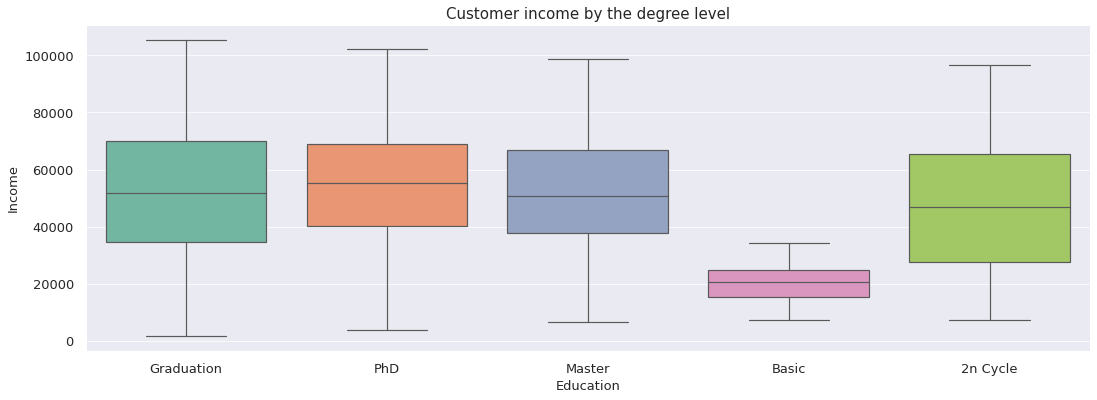

In [24]:
plt.figure(figsize=(18,6))
sns.boxplot(data=data.query('Income<500000'),x='Education', y='Income',
            palette=PALETTE,showfliers=False )
plt.title('Customer income by the degree level')
plt.show()

As you see frm the Box plot, Graduate and Postgraduate income are almost the same exepect for the undergrdaute where the income status is abit lower.

# Average spending on each product according to the level of education

In [25]:
#Averge spending on MntWines
wine_spent = data.groupby("Education")['MntWines'].mean()
wine_spent

Education
2n Cycle      200.845000
Basic           7.240741
Graduation    285.045699
Master        332.980822
PhD           407.222453
Name: MntWines, dtype: float64

In [26]:
#Averge spending on MntFruits
fruits_spent=data.groupby("Education")['MntFruits'].mean()
fruits_spent

Education
2n Cycle      29.360000
Basic         11.111111
Graduation    30.861111
Master        21.375342
PhD           20.145530
Name: MntFruits, dtype: float64

In [27]:
#Average spending on MntMeatProducts
meatproducts_spent=data.groupby("Education")['MntMeatProducts'].mean()

meatproducts_spent

Education
2n Cycle      135.080000
Basic          11.444444
Graduation    180.393369
Master        162.920548
PhD           169.738046
Name: MntMeatProducts, dtype: float64

In [28]:
#Averge spending on MntFishProducts
fishproducts_spent = data.groupby("Education")['MntFishProducts'].mean()
fishproducts_spent

Education
2n Cycle      48.040000
Basic         17.055556
Graduation    43.416667
Master        31.493151
PhD           26.877339
Name: MntFishProducts, dtype: float64

In [29]:
#Averge spending on MntSweetProducts
sweetproducts_spent = data.groupby("Education")['MntSweetProducts'].mean()
sweetproducts_spent



Education
2n Cycle      34.725000
Basic         12.111111
Graduation    31.285842
Master        20.808219
PhD           20.347193
Name: MntSweetProducts, dtype: float64

In [30]:
#Averge spending on the MntGoldProds
gold_prods_spent = data.groupby("Education")['MntGoldProds'].mean()
gold_prods_spent

Education
2n Cycle      46.880000
Basic         22.833333
Graduation    50.683692
Master        40.189041
PhD           32.403326
Name: MntGoldProds, dtype: float64

In [31]:
label= label=data.groupby('Education').count()['ID'].index
label

Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object', name='Education')

In [32]:

xpos= np.arange(len(label))
xpos

array([0, 1, 2, 3, 4])

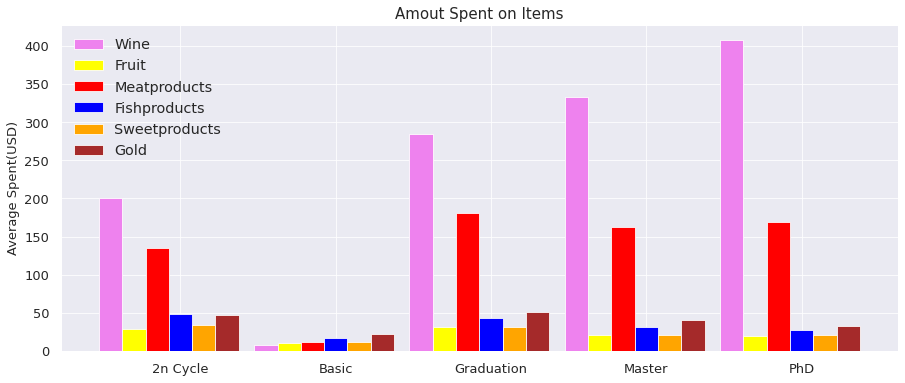

In [33]:
plt.figure(figsize=(15,6))
plt.bar(xpos-0.45, wine_spent, width=0.15, label="Wine", color='violet')
plt.bar(xpos-0.3, fruits_spent, width=0.15, label="Fruit", color='yellow')
plt.bar(xpos-0.15, meatproducts_spent, width=0.15, label="Meatproducts", color='red')
plt.bar(xpos, fishproducts_spent, width=0.15, label="Fishproducts", color='Blue')
plt.bar(xpos+0.15, sweetproducts_spent, width=0.15, label="Sweetproducts", color='orange')
plt.bar(xpos+0.3, gold_prods_spent, width=0.15, label="Gold", color='brown')

plt.xticks(xpos, label)
plt.ylabel("Average Spent(USD)")
plt.title('Amout Spent on Items')
plt.legend(loc='upper left',shadow=True,fontsize='large')

# Observation:

Here we found that More Educated people spending more on wines!! In case of Fruits We can't find big variation. In case of Meat Products also not that much variation based on education. Compared to others People with only Basic Education spent very less on all items. It may be due to their less income. Fruit,Fish,Sweet and Gold spent more in 2nd Cycle and Graduated People. Top spending item is Wine then Meat Products.

# 2. EDA based on Numbers of Kids

In [34]:
data['Kidhome'].value_counts()

0    1283
1     887
2      46
Name: Kidhome, dtype: int64

In [35]:
#Plot the pie of the Kidhome 
figure=ex.pie(data,
               names='Kidhome',
               title='Kidhome Distribution')
figure.show()

The piechartplot show thats 57.9% of the home are without kinds and followed by 40% of the customers with one kid and 2.08% with 2 kids

In [36]:
# Plot the Histogram of 'Kidhome'
figure = ex.histogram(data, 
                      x='Kidhome', 
                      title='Kidhome Distribution', 
                      labels={'x': 'Kidhome', 'y':'Count'}, 
                      nbins=3)

figure.show()

The histogram plot shows that over 12000 customers donot have a kid while around 900 customers have a kid. However below 200 customers have 2 kids 

In [37]:
# Plot the Box Plot of 'Kidhome'
figure = ex.box(data, 
                y='Kidhome')

figure.show()

The box plot is showing that there is no outliers in the Kidhome entries which mean all the data entries is correct.

In [38]:
#Average Spending on Wines
wine_spent1=data.groupby("Kidhome").mean()['MntWines']
wine_spent1

Kidhome
0    452.237724
1    104.340474
2     72.000000
Name: MntWines, dtype: float64

In [39]:
#Average Spending on Fruits
fruit_spent1=data.groupby("Kidhome").mean()['MntFruits']
fruit_spent1

Kidhome
0    39.400624
1     8.541150
2     6.043478
Name: MntFruits, dtype: float64

In [40]:
#Average Spending on Meat Products
meat_spent1=data.groupby("Kidhome").mean()['MntMeatProducts']
meat_spent1

Kidhome
0    253.405300
1     49.109357
2     30.086957
Name: MntMeatProducts, dtype: float64

In [41]:
#Average Spending on Fish Products
fish_spent1=data.groupby("Kidhome").mean()['MntFishProducts']
fish_spent1

Kidhome
0    56.270460
1    12.281849
2     6.869565
Name: MntFishProducts, dtype: float64

In [42]:
#Average Spending on Sweet Products
sweet_spent1=data.groupby("Kidhome").mean()['MntSweetProducts']
sweet_spent1

Kidhome
0    40.590803
1     8.612176
2     3.891304
Name: MntSweetProducts, dtype: float64

In [43]:
#Average Spending on Gold Products
gold_spent1=data.groupby("Kidhome").mean()['MntGoldProds']
gold_spent1

Kidhome
0    60.045207
1    22.111612
2    16.869565
Name: MntGoldProds, dtype: float64

In [44]:
label1=data.groupby('Kidhome').count()['ID'].index
label1

Int64Index([0, 1, 2], dtype='int64', name='Kidhome')

In [45]:
xpos1 = np.arange(len(label1))
xpos1

array([0, 1, 2])

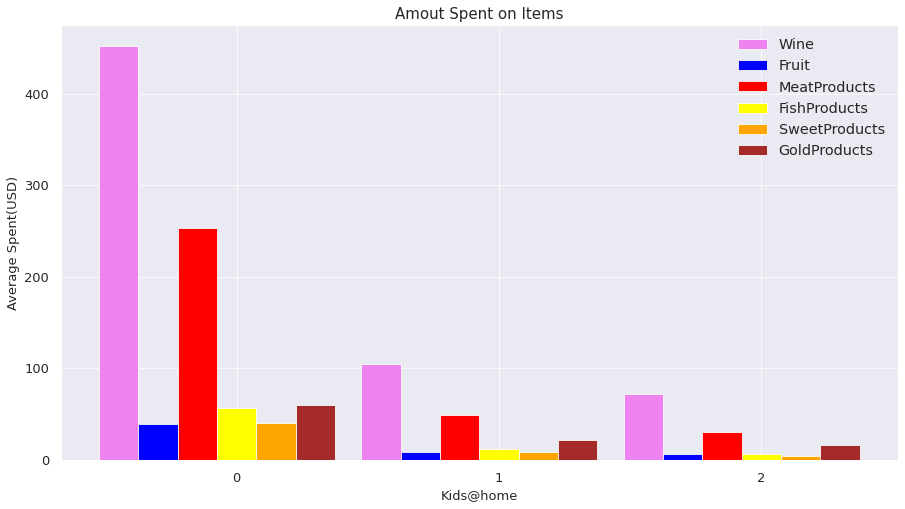

In [46]:
plt.figure(figsize=(15,8))
plt.bar(xpos1-0.45,wine_spent1,width=0.15, label="Wine",color='violet')
plt.bar(xpos1-0.3,fruit_spent1,width=0.15,label="Fruit", color='blue')
plt.bar(xpos1-0.15,meat_spent1,width=0.15,label="MeatProducts",color='red')
plt.bar(xpos1,fish_spent1,width=0.15,label="FishProducts",color='yellow')
plt.bar(xpos1+0.15,sweet_spent1,width=0.15,label="SweetProducts",color='orange')
plt.bar(xpos1+0.3,gold_spent1,width=0.15,label="GoldProducts",color='brown')

plt.xticks(xpos1,label1)
plt.xlabel('Kids@home')
plt.ylabel("Average Spent(USD)")
plt.title('Amout Spent on Items')
plt.legend(shadow=True,fontsize='large')

# Observation:

People with no children at home spent very much compared to others

# 3. EDA based on Numbers of Teens

In [47]:
data['Teenhome'].value_counts()

0    1147
1    1018
2      51
Name: Teenhome, dtype: int64

In [48]:
#Plot the pie of the Kidhome 
figure=ex.pie(data,
               names='Teenhome',
               title='Teenhome Distribution')
figure.show()

In [49]:
# Plot the Histogram of 'Kidhome'
figure = ex.histogram(data, 
                      x='Teenhome', 
                      title='Teemhome Distribution', 
                      labels={'x': 'Teenhome', 'y':'Count'}, 
                      nbins=3)

figure.show()

In [50]:
# Plot the Box Plot of 'Kidhome'
figure = ex.box(data, 
                y='Teenhome')

figure.show()

In [51]:
#Average Spending on Wines
wine_spent2=data.groupby("Teenhome").mean()['MntWines']
wine_spent2

Teenhome
0    305.963383
1    301.630648
2    354.568627
Name: MntWines, dtype: float64

In [52]:
#Average Spending on Fruits
fruit_spent2=data.groupby("Teenhome").mean()['MntFruits']
fruit_spent2

Teenhome
0    33.344377
1    18.927308
2    17.470588
Name: MntFruits, dtype: float64

In [53]:
#Average Spending on Meat Products
meat_spent2=data.groupby("Teenhome").mean()['MntMeatProducts']
meat_spent2

Teenhome
0    226.622493
1    101.975442
2    123.843137
Name: MntMeatProducts, dtype: float64

In [54]:
#Average Spending on Fish Products
fish_spent2=data.groupby("Teenhome").mean()['MntFishProducts']
fish_spent2

Teenhome
0    48.811683
1    25.763261
2    23.352941
Name: MntFishProducts, dtype: float64

In [55]:
#Average Spending on Sweet Products
sweet_spent2=data.groupby("Teenhome").mean()['MntSweetProducts']
sweet_spent2

Teenhome
0    33.550131
1    20.263261
2    15.411765
Name: MntSweetProducts, dtype: float64

In [56]:
#Average Spending on Gold Products
gold_spent2=data.groupby("Teenhome").mean()['MntGoldProds']
gold_spent2

Teenhome
0    45.113339
1    42.598232
2    45.431373
Name: MntGoldProds, dtype: float64

In [57]:
label2=data.groupby('Teenhome').count()['ID'].index
label2

Int64Index([0, 1, 2], dtype='int64', name='Teenhome')

In [58]:
xpos2 = np.arange(len(label2))
xpos2

array([0, 1, 2])

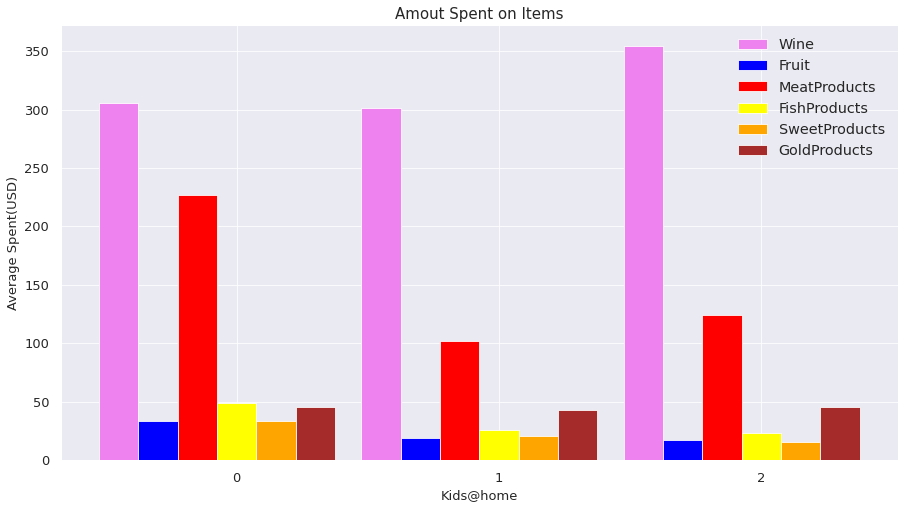

In [59]:
plt.figure(figsize=(15,8))
plt.bar(xpos2-0.45,wine_spent2,width=0.15, label="Wine",color='violet')
plt.bar(xpos2-0.3,fruit_spent2,width=0.15,label="Fruit", color='blue')
plt.bar(xpos2-0.15,meat_spent2,width=0.15,label="MeatProducts",color='red')
plt.bar(xpos2,fish_spent2,width=0.15,label="FishProducts",color='yellow')
plt.bar(xpos2+0.15,sweet_spent2,width=0.15,label="SweetProducts",color='orange')
plt.bar(xpos2+0.3,gold_spent2,width=0.15,label="GoldProducts",color='brown')

plt.xticks(xpos2,label2)
plt.xlabel('Kids@home')
plt.ylabel("Average Spent(USD)")
plt.title('Amout Spent on Items')
plt.legend(shadow=True,fontsize='large')

# 4. EDA based on Marital Status

In [60]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

YOLO

YOLO (You only live once) accords to the lifestyle or trend that many young people have adopted as a way to better enjoy life, and not to think about saving up for the future.

Absurd

In philosophy, "the Absurd" refers to the conflict between the human tendency to seek inherent value and meaning in life, and the human inability to find these with any certainty.

In [61]:
# Plot the Pie Chart of 'Marital_Status'
figure = ex.pie(data, 
                names='Marital_Status', 
                title='Marital Status Distribution')

figure.show()

In [62]:
# Plot the histogram of 'Marital_Status'
figure = ex.histogram(data, 
                x='Marital_Status', 
                title='Marital Status Distribution',
                labels={'x':'Marital Status', 'y':'count'})

figure.show()

In [63]:
# Plot the box of 'Marital_Status'
figure = ex.box(data, 
                y='Marital_Status' 
                )

figure.show()

In [64]:
#Average Spending on Wines
wine_spent3=data.groupby("Marital_Status").mean()['MntWines']
wine_spent3

Marital_Status
Absurd      355.500000
Alone       184.666667
Divorced    324.844828
Married     299.855309
Single      291.331210
Together    308.403141
Widow       367.131579
YOLO        322.000000
Name: MntWines, dtype: float64

In [65]:
#Average Spending on Fruits
fruit_spent3=data.groupby("Marital_Status").mean()['MntFruits']
fruit_spent3

Marital_Status
Absurd      84.500000
Alone        4.000000
Divorced    27.426724
Married     25.648775
Single      27.261146
Together    25.500873
Widow       31.868421
YOLO         3.000000
Name: MntFruits, dtype: float64

In [66]:
#Average Spending on Meat Products
meat_spent3=data.groupby("Marital_Status").mean()['MntMeatProducts']
meat_spent3

Marital_Status
Absurd      312.500000
Alone        26.333333
Divorced    150.206897
Married     160.896149
Single      184.849257
Together    166.446771
Widow       185.328947
YOLO         50.000000
Name: MntMeatProducts, dtype: float64

In [67]:
#Average Spending on Fish Products
fish_spent3=data.groupby("Marital_Status").mean()['MntFishProducts']
fish_spent3

Marital_Status
Absurd      205.500000
Alone         7.666667
Divorced     35.043103
Married      35.466744
Single       38.772824
Together     39.062827
Widow        49.907895
YOLO          4.000000
Name: MntFishProducts, dtype: float64

In [68]:
#Average Spending on Sweet Products
sweet_spent3=data.groupby("Marital_Status").mean()['MntSweetProducts']
sweet_spent3

Marital_Status
Absurd      30.500000
Alone        7.000000
Divorced    26.818966
Married     26.751459
Single      27.072187
Together    26.232112
Widow       37.868421
YOLO         3.000000
Name: MntSweetProducts, dtype: float64

In [69]:
#Average Spending on Gold Products
gold_spent3=data.groupby("Marital_Status").mean()['MntGoldProds']
gold_spent3

Marital_Status
Absurd      204.000000
Alone        27.000000
Divorced     46.288793
Married      42.845974
Single       43.305732
Together     43.200698
Widow        55.855263
YOLO         42.000000
Name: MntGoldProds, dtype: float64

In [70]:
label3=data.groupby('Marital_Status').count()['ID'].index
label3

Index(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow',
       'YOLO'],
      dtype='object', name='Marital_Status')

In [71]:
xpos3 = np.arange(len(label3))
xpos3

array([0, 1, 2, 3, 4, 5, 6, 7])

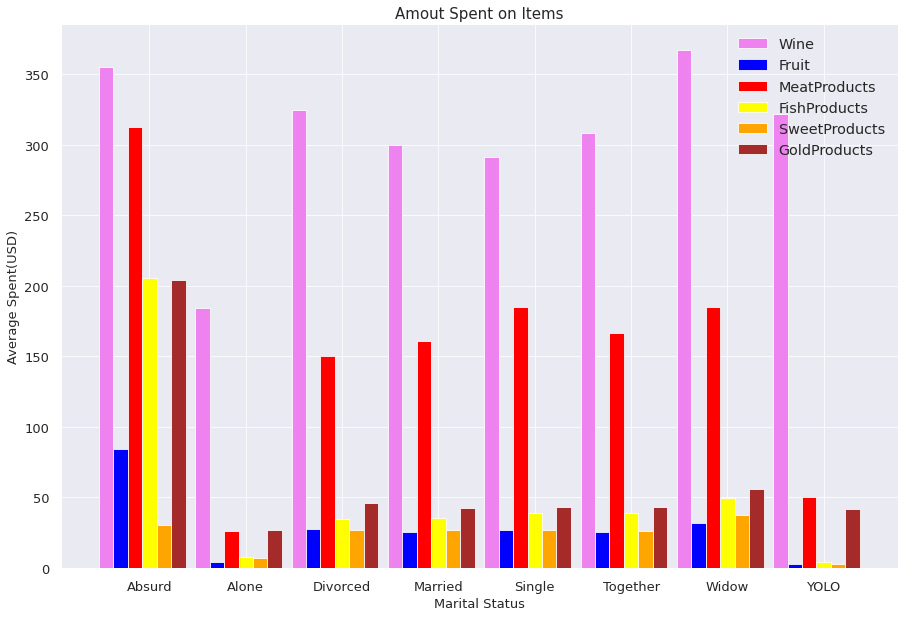

In [72]:
plt.figure(figsize=(15,10))
plt.bar(xpos3-0.45,wine_spent3,width=0.15, label="Wine",color='violet')
plt.bar(xpos3-0.3,fruit_spent3,width=0.15,label="Fruit", color='blue')
plt.bar(xpos3-0.15,meat_spent3,width=0.15,label="MeatProducts",color='red')
plt.bar(xpos3,fish_spent3,width=0.15,label="FishProducts",color='yellow')
plt.bar(xpos3+0.15,sweet_spent3,width=0.15,label="SweetProducts",color='orange')
plt.bar(xpos3+0.3,gold_spent3,width=0.15,label="GoldProducts",color='brown')

plt.xticks(xpos3,label3)
plt.xlabel('Marital Status')
plt.ylabel("Average Spent(USD)")
plt.title('Amout Spent on Items')
plt.legend(loc='best',shadow=True,fontsize='large')

# Observation

In case of Absurd we can see Average spending very high compared to others. That may be due to very less sample data. There are only 2 customers in this class. So if one of them very lavish then it will effect result. So we cannot consder it as a common case

# 5. How diverse is the Age Group of Clients

In [73]:
# Convert the 'Dt_Customer' column into a datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [74]:
# Plot the Histogram of 'Dt_Customer'
figure = ex.histogram(data,
                      x='Dt_Customer', 
                      title='Datetime Customer Distribution', 
                      labels={'x': 'Datetime Customer', 'y':'Count'})

figure.show()

In [75]:
data['Age']=2022-data.Year_Birth.to_numpy()
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,41


In [76]:
age_count=data.groupby("Age").count()['ID']
age_count

Age
26      2
27      5
28      3
29      5
30     13
31     15
32     18
33     29
34     29
35     27
36     41
37     32
38     38
39     41
40     44
41     38
42     39
43     53
44     76
45     52
46     89
47     83
48     69
49     72
50     78
51     86
52     75
53     70
54     51
55     44
56     50
57     74
58     41
59     44
60     44
61     35
62     49
63     50
64     52
65     41
66     55
67     48
68     49
69     35
70     52
71     42
72     29
73     30
74     21
75     16
76     16
77      8
78      7
79      6
81      1
82      1
122     1
123     1
129     1
Name: ID, dtype: int64

In [77]:
label4=data.groupby('Age').count()['ID'].index
label4

Int64Index([ 26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
             39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
             52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
             65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
             78,  79,  81,  82, 122, 123, 129],
           dtype='int64', name='Age')

In [78]:
xpos4 = np.arange(len(label4))
xpos4

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58])

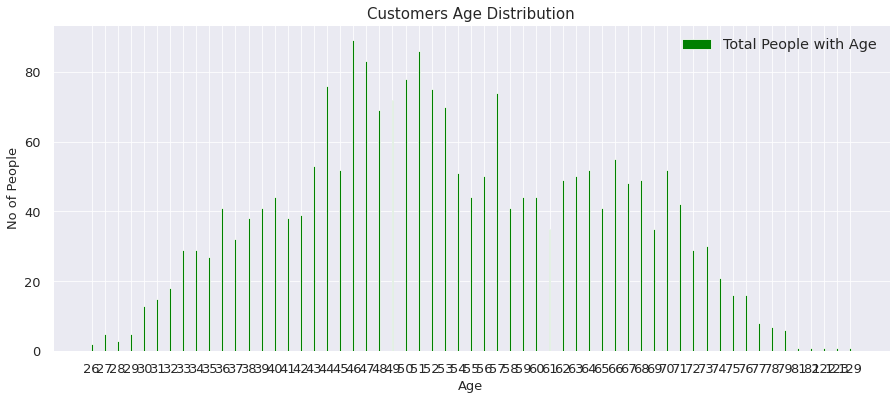

In [79]:
plt.figure(figsize=(15,6))
plt.bar(xpos4,width=0.15, label="Total People with Age",color='green',height =age_count)

plt.xticks(xpos4,label4)
plt.xlabel('Age')
plt.ylabel("No of People")
plt.title('Customers Age Distribution')
plt.legend(loc='best',shadow=True,fontsize='large')

# Observation

Clearly we can see that most of the customers comes under the age between 25 and 85. While marketing we can consider this age group

# EDA on Income

In [80]:
# Check for NaN values in 'Income'
print('Income NaN value count: {}'.format(len(data[data['Income'].isna()])))

Income NaN value count: 0


In [81]:
# Plot histogram of 'Income'
figure = ex.histogram(data, 
                      x='Income', 
                      title='Income Distribution', 
                      labels={'x': 'Income', 'y': 'Count'})

figure.show()

In [82]:
# Plot the Boxplot of Income Distribution
figure = ex.box(data_frame=data, 
                y='Income')

figure.show()

# 6. How correlated are Income and Kids at home

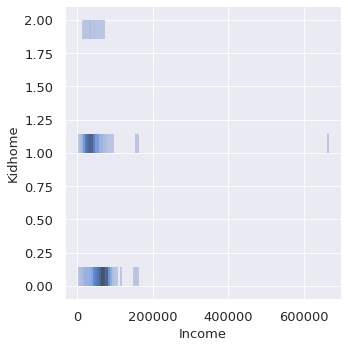

In [83]:
sns.displot(data=data,x='Income',y="Kidhome")

# Observation

We can see that with no kids more people have high income, with 1 kid more people with less income, with 2 kids income range itself less

# 7. How correlated are Income and Teens at home

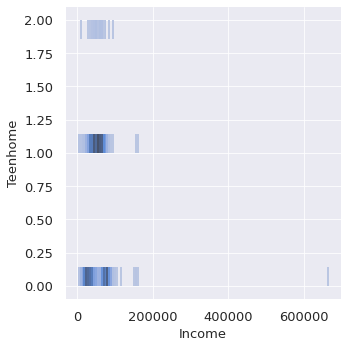

In [84]:
sns.displot(data=data,x='Income',y="Teenhome")

# Observation
We can see that with no Teens more people have high income, with 1 Teen more people with less income, with 2 Teens income range itself less

# 8. How does Income depend on Education

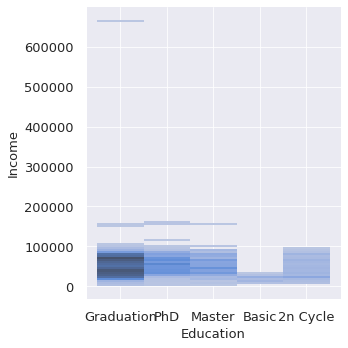

In [85]:
sns.displot(data=data, x="Education", y="Income")

# Observation

We can see that People having only Basic Education have very less income compared to all others

**Recency**

Number of days since customer's last purchase

In [86]:
# Plot the Histogram of 'Recency'
figure = ex.histogram(data, 
                      x='Recency', 
                      title='Recency Distribution', 
                      labels={'x': 'Recency', 'y':'Count'}, 
                      nbins=data['Recency'].nunique()*3)

figure.show()

In [87]:
# Plot the Box Plot of 'Recency'
figure = ex.box(data, 
                y='Recency')

figure.show()

 **Complain**
 
1 if the customer complained in the last 2 years, 0 otherwise.

In [88]:
# Plot the Histogram of 'Complain'
figure = ex.histogram(data, 
                      x='Complain', 
                      title='Complain Distribution', 
                      labels={'x': 'Complain', 'y':'Count'})

figure.show()

The 'Complain' is characterized by a right-skeweness.

# Products

**MntWines**

Amount spent on wine in last 2 years.

In [89]:
# Plot the Histogram of 'MntWines'
figure = ex.histogram(data, 
                      x='MntWines', 
                      title='MntWines Distribution', 
                      labels={'x': 'MntWines', 'y': 'Count'}, 
                      nbins=data['MntWines'].nunique()*3)

figure.show()

In [90]:
# Plot the Box Plot of 'MntWines'
figure = ex.box(data, 
                y='MntWines')

figure.show()

The 'MntWines' distribution follows a Poisson Distribution, with some huge outliers. It would be reasonable to cut the tail of the distribution after a certain percentile (Q3)

**MntFruits**

Amount spent on fruits in last 2 years.

In [91]:
# Plot the Histogram of 'MntFruits'
figure = ex.histogram(data, 
                      x='MntFruits', 
                      title='MntWines Distribution', 
                      labels={'x': 'MntFruits', 'y': 'Count'}, 
                      nbins=data['MntFruits'].nunique()*3)

figure.show()

In [92]:
# Plot the Box Plot of 'MntFruits'
figure = ex.box(data, 
                y='MntFruits')

figure.show()

The 'MntFruits' distribution follows a Poisson Distribution, with some huge outliers. It would be reasonable to cut the tail of the distribution after a certain percentile (Q3)

# MntMeatProducts
Amount spent on meat in last 2 years.

In [93]:
# Plot the Histogram of 'MntMeatProducts'
figure = ex.histogram(data, 
                      x='MntMeatProducts', 
                      title='MntWines Distribution', 
                      labels={'x': 'MntMeatProducts', 'y': 'Count'}, 
                      nbins=data['MntMeatProducts'].nunique()*3)

figure.show()

In [94]:
# Plot the Box Plot of 'MntMeatProducts'
figure = ex.box(data, 
                y='MntMeatProducts')

figure.show()

The 'MntMeatProducts' distribution follows a Poisson Distribution, with some huge outliers. It would be reasonable to cut the tail of the distribution after a certain percentile (Q3).

**MntFishProducts**

Amount spent on fish in last 2 years.

In [95]:
# Plot the Histogram of 'MntFishProducts'
figure = ex.histogram(data, 
                      x='MntFishProducts', 
                      title='MntFishProducts Distribution', 
                      labels={'x': 'MntFishProducts', 'y': 'Count'}, 
                      nbins=data['MntFishProducts'].nunique()*3)

figure.show()

In [96]:
# Plot the Box Plot of 'MntFishProducts'
figure = ex.box(data, 
                y='MntFishProducts')

figure.show()

The 'MntFishProducts' distribution follows a Poisson Distribution, with some huge outliers. It would be reasonable to cut the tail of the distribution after a certain percentile (Q3).

**MntSweetProducts**

Amount spent on sweets in last 2 years.

In [97]:
# Plot the Histogram of 'MntSweetProducts'
figure = ex.histogram(data, 
                      x='MntSweetProducts', 
                      title='MntSweetProducts Distribution', 
                      labels={'x': 'MntSweetProducts', 'y': 'Count'}, 
                      nbins=data['MntSweetProducts'].nunique()*3)

figure.show()

In [98]:
# Plot the Box Plot of 'MntSweetProducts'
figure = ex.box(data, 
                y='MntSweetProducts')

figure.show()

The 'MntSweetProducts' distribution follows a Poisson Distribution, with some huge outliers. It would be reasonable to cut the tail of the distribution after a certain percentile (Q3)

 **MntGoldProds**
 
Amount spent on gold in last 2 years.

In [99]:
# Plot the Histogram of 'MntGoldProds'
figure = ex.histogram(data, 
                      x='MntGoldProds', 
                      title='MntGoldProds Distribution', 
                      labels={'x': 'MntGoldProds', 'y': 'Count'}, 
                      nbins=data['MntGoldProds'].nunique()*3)

figure.show()

In [100]:
# Plot the Box Plot of 'MntGoldProds'
figure = ex.box(data, 
                y='MntGoldProds')

figure.show()


The 'MntGoldProds' distribution is right skewed, with some huge outliers. It would be reasonable to cut the tail of the distribution after a certain percentile (Q3)

# Promotion

 **NumDealsPurchases**
 
Number of purchases made with a discount.

In [101]:
# Plot the Histogram of 'NumDealsPurchases'
figure = ex.histogram(data, 
                      x='NumDealsPurchases', 
                      title='NumDealsPurchases Distribution', 
                      labels={'x': 'NumDealsPurchases', 'y': 'Count'})

figure.show()

In [102]:
# Plot the Box Plot of 'NumDealsPurchases'
figure = ex.box(data, 
                y='NumDealsPurchases')

figure.show()

The 'NumDealsPurchases' is right-skewed and the tail can be cut at Q3.

**AcceptedCmp1 - 5**

1 if customer accepted the offer in the nth campaign, 0 otherwise.

In [103]:
# Plot the Histogram of 'NumDealsPurchases'
for i in range(1, 6):
    figure = ex.histogram(data, 
                          x='AcceptedCmp{}'.format(i), 
                          title='AcceptedCmp{} Distribution'.format(i), 
                          labels={'x': 'AcceptedCmp{}'.format(i), 'y': 'Count'})

    figure.show()

All these features are characterized by a strong skewness.

**Response**

1 if customer accepted the offer in the last campaign, 0 otherwise.

In [104]:
# Plot the Histogram of 'Response'
figure = ex.histogram(data, 
                      x='Response', 
                      title='Response Distribution', 
                      labels={'x': 'Response', 'y': 'Count'})

figure.show()

# Place

**NumWebPurchases**

Number of purchases made through the company’s website.

In [105]:
# Plot Histogram of 'NumWebPurchases'
figure = ex.histogram(data, 
                      x='NumWebPurchases', 
                      title='NumWebPurchases Distribution', 
                      labels={'x': 'NumWebPurchases', 'y': 'Count'})

figure.show()

In [106]:
# Plot the Box Plot of 'NumWebPurchases'
figure = ex.box(data, 
                y='NumWebPurchases')

figure.show()

The 'NumWebPurchases' presents a binomial distribution with some outliers. The value 11 looks like a good cut.

**NumCatalogPurchases**

Number of purchases made using a catalogue.

In [107]:
# Plot Histogram of 'NumWebPurchases'
figure = ex.histogram(data, 
                      x='NumCatalogPurchases', 
                      title='NumCatalogPurchases Distribution', 
                      labels={'x': 'NumCatalogPurchases', 'y': 'Count'})

figure.show()

In [108]:
# Plot the Box Plot of 'NumCatalogPurchases'
figure = ex.box(data, 
                y='NumCatalogPurchases')

figure.show()

The 'NumCatalogPurchases' presents a binomial distribution with some outliers. The value 10 looks like a good cut.

**NumStorePurchases**

Number of purchases made directly in stores.

In [109]:
# Plot Histogram of 'NumStorePurchases'
figure = ex.histogram(data, 
                      x='NumStorePurchases', 
                      title='NumStorePurchases Distribution', 
                      labels={'x': 'NumStorePurchases', 'y': 'Count'})

figure.show()

In [110]:
# Plot the Box Plot of 'NumStorePurchases'
figure = ex.box(data, 
                y='NumStorePurchases')

figure.show()

The 'NumStorePurchases' has a right-skewed distribution. No significant outliers.

**NumWebVisitsMonth**

Number of visits to company’s website in the last month.

In [111]:
# Plot Histogram of 'NumWebVisitsMonth'
figure = ex.histogram(data, 
                      x='NumWebVisitsMonth', 
                      title='NumWebVisitsMonth Distribution', 
                      labels={'x': 'NumWebVisitsMonth', 'y': 'Count'})

figure.show()

In [112]:
# Plot the Box Plot of 'NumWebVisitsMonth'
figure = ex.box(data, 
                y='NumWebVisitsMonth')

figure.show()

# 9. Correlation among all features

In [113]:
#Let's look how correlated are all these features related to each other
data.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,...,-0.013070,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,-0.021491,-0.002355
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,...,-0.127891,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,0.023692,-1.000000
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,0.133047,0.161791
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,...,-0.501349,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,-0.077909,-0.233615
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,...,0.049737,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,-0.153901,0.350791
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,...,-0.000434,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,-0.199766,0.016295
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,...,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,0.246299,0.159451
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,...,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,0.122443,0.017747
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,...,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,0.237746,0.033697
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,...,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,0.108145,0.040425


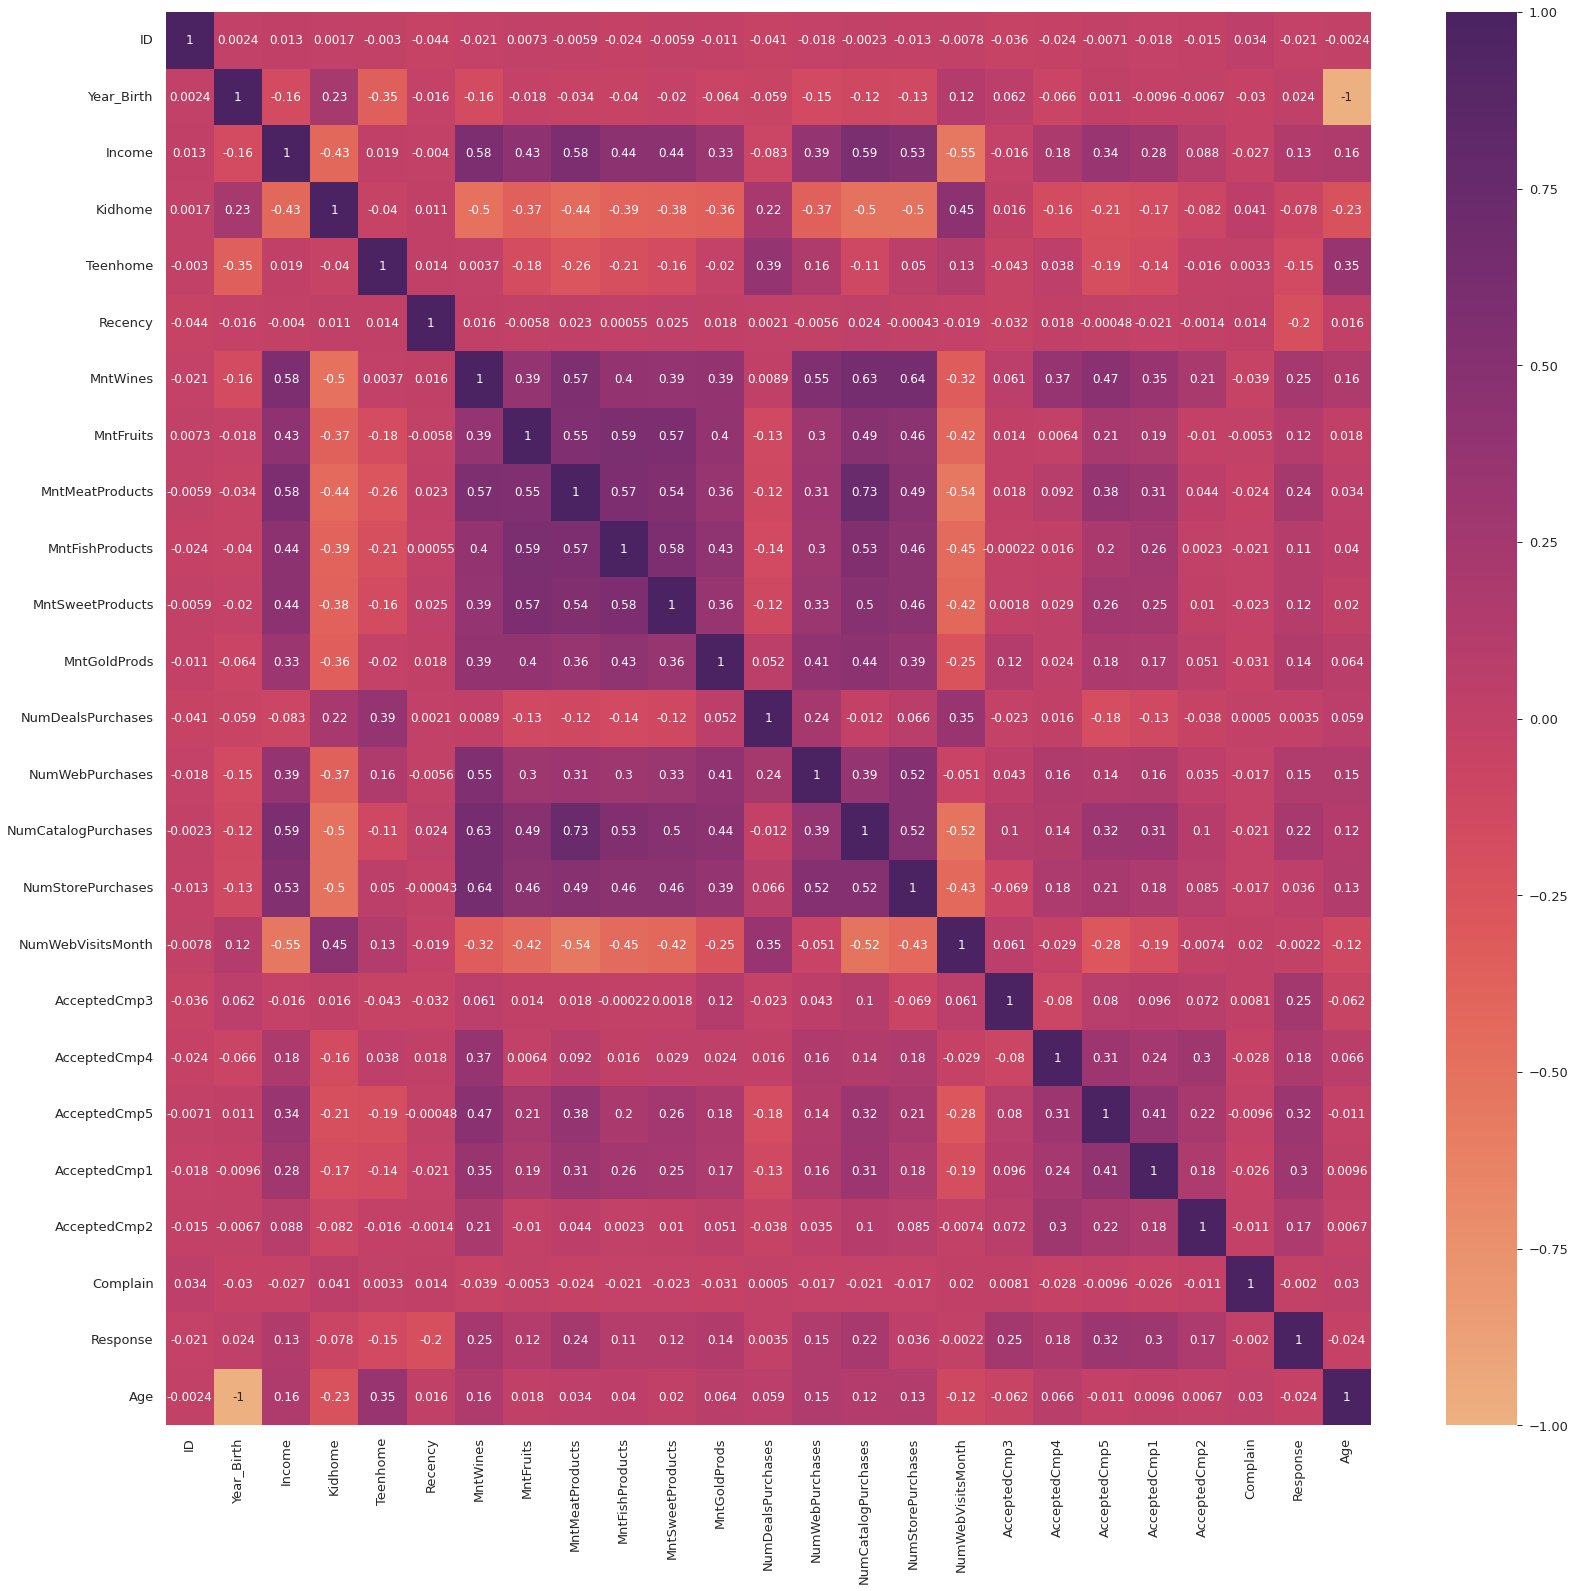

In [114]:
cor = data.corr()
plt.figure(figsize = (27,26))

sns.heatmap(cor, 
            annot = True,
            cmap = 'flare')
plt.show()

# Data cleaning

**In the next bit, I will be performing the following steps to engineer some new features:**

1. Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
2. Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
3. Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
4. Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
5. To get further clarity of household, Creating feature indicating "Family_Size"
6. Create a feature "Is_Parent" to indicate parenthood status
7. Lastly, I will create three categories in the "Education" by simplifying its value counts.
8. Dropping some of the redundant features

In [115]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [116]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [117]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [118]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [119]:
#Now that we have some new features let's have a look at the data's stats.
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_For,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,52.179603,3.054423e+16,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,11.985554,1.749036e+16,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000e+00,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,1.555200e+16,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,51.000000,3.071520e+16,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,62.000000,4.570560e+16,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,128.000000,6.039360e+16,2525.000000,3.000000,5.000000,1.000000


# Data preprocessing

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:
**

1. Label encoding the categorical features
1. Scaling the features using the standard scaler
1. Creating a subset dataframe for dimensionality reduction

In [120]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [121]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [122]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [123]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Customer_For,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.894187,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,2.504712,-0.554143,0.693232,0.986443,1.529129,1.675488,-1.348829,-1.264803,-1.758673,-1.581389
1,-0.894187,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.571082,-1.169518,-0.131574,1.236801,-1.188411,-0.962358,-1.348829,1.405806,0.450009,0.632356
2,-0.894187,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.229327,1.291982,-0.543978,0.318822,-0.205155,0.280250,0.741384,-1.264803,-0.654332,-1.581389
3,-0.894187,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.912837,-0.554143,0.280829,-1.266777,-1.059945,-0.919224,0.741384,0.070501,0.450009,0.632356
4,0.569268,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0.112428,0.061232,-0.131574,-1.016420,-0.951244,-0.307044,0.741384,0.070501,0.450009,0.632356


# Dimensionality Reduction

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
**Dimensionality reduction** is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**

1. Dimensionality reduction with PCA
2. Plotting the reduced dataframe
3. Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.


In [124]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-7.054125e-17,2.850029,-5.881401,-2.489399,-0.795923,2.428344,7.390968
col2,2216.0,6.412841e-17,1.701845,-4.169991,-1.317378,-0.186319,1.232900,6.140592
col3,2216.0,2.044093e-17,1.228077,-5.067076,-0.845479,-0.048338,0.864149,6.717323


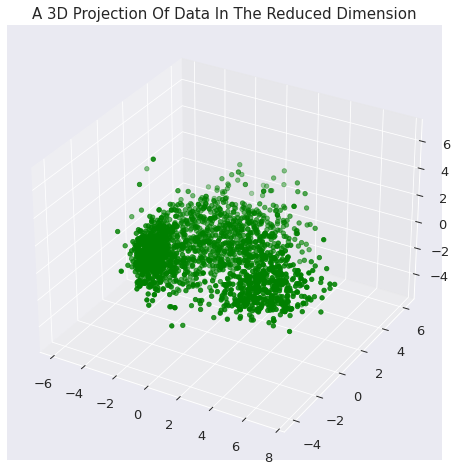

In [125]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**

1. Elbow Method to determine the number of clusters to be formed
1. Clustering via Agglomerative Clustering
1. Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


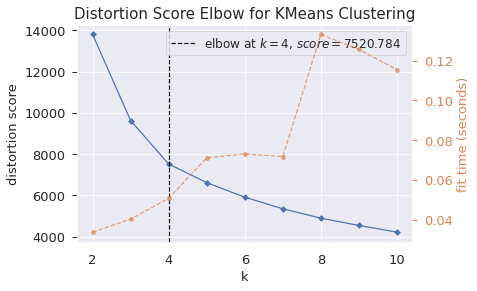

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [126]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [127]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

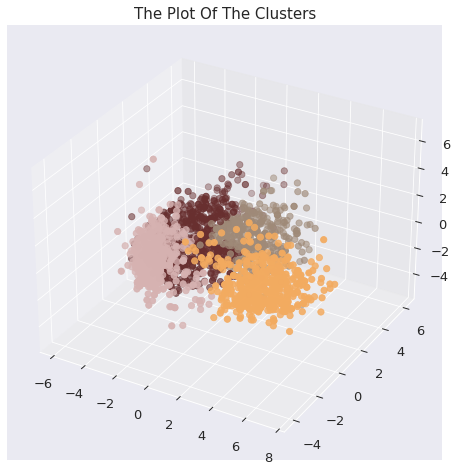

In [128]:
#Plotting the clusters
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Evaluating the model

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

**Firstly, let us have a look at the group distribution of clustring**

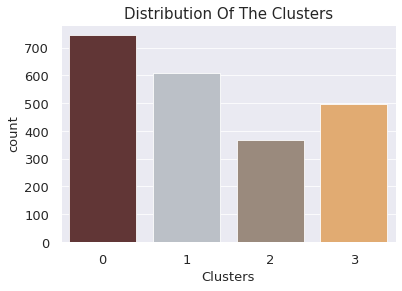

In [129]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.

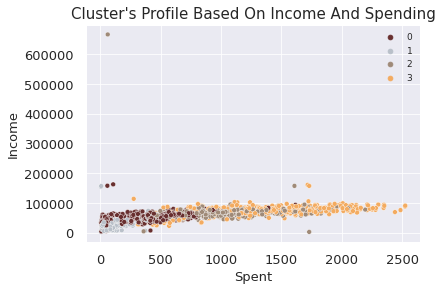

In [130]:
#fig = plt.figure(figsize=(10,8))
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

****Income vs spending plot shows the clusters pattern

group 0: high spending & average income

group 1: high spending & high income

group 2: low spending & low income

group 3: high spending & low income

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

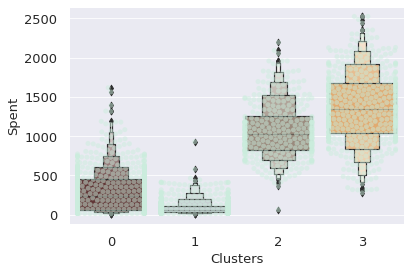

In [131]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

Let us next explore how did our campaigns do in the past.

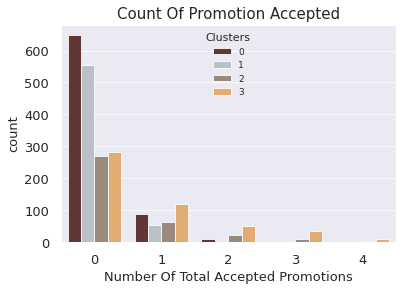

In [132]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

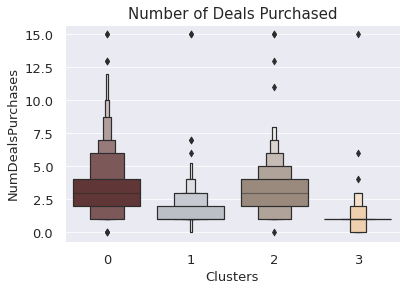

In [133]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 1. However, our star customers cluster 2 are not much into the deals. Nothing seems to attract cluster 3 overwhelmingly

# Profiling 

Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 432x288 with 0 Axes>

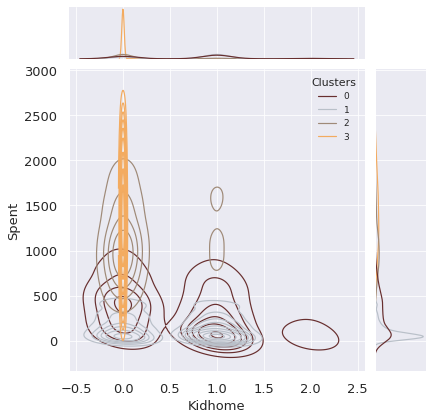

<Figure size 432x288 with 0 Axes>

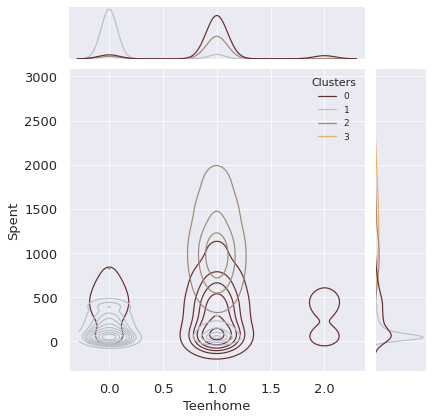

<Figure size 432x288 with 0 Axes>

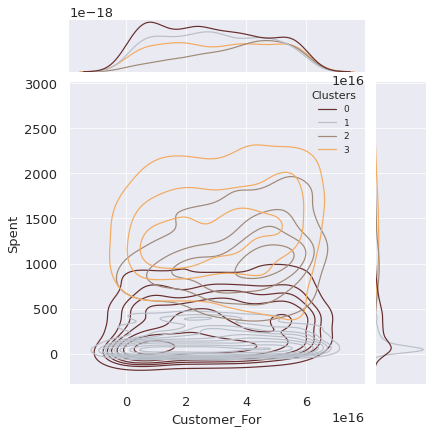

<Figure size 432x288 with 0 Axes>

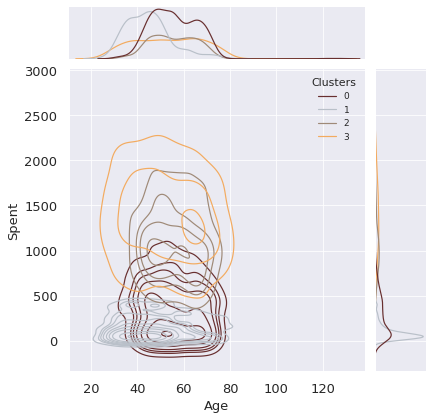

<Figure size 432x288 with 0 Axes>

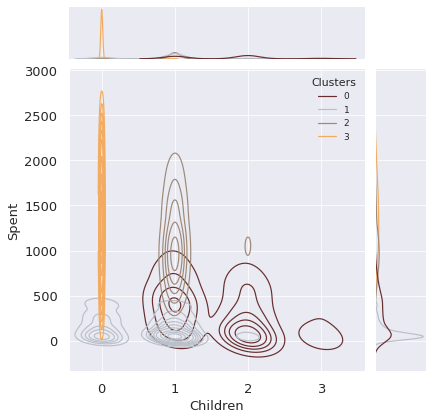

<Figure size 432x288 with 0 Axes>

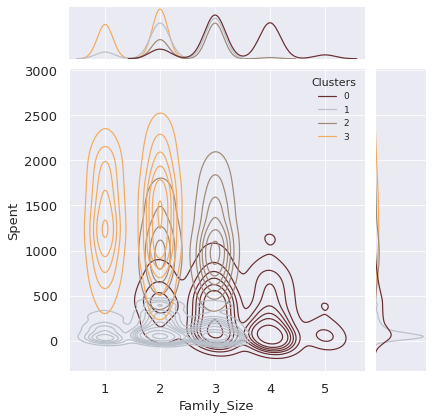

<Figure size 432x288 with 0 Axes>

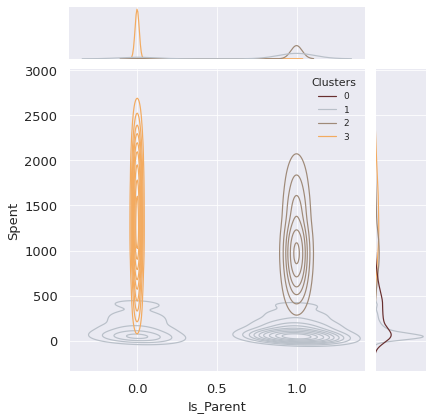

<Figure size 432x288 with 0 Axes>

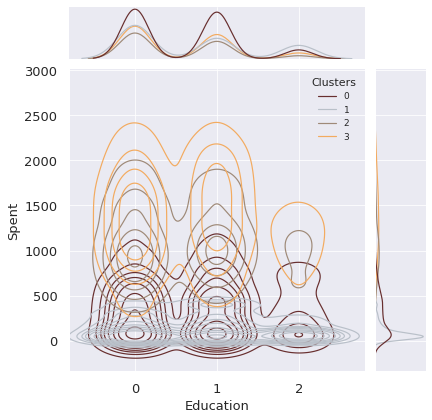

<Figure size 432x288 with 0 Axes>

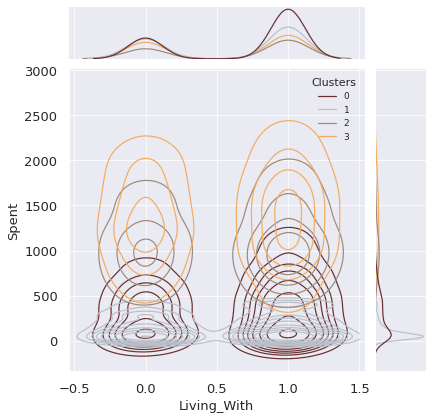

In [134]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

# Conclusion

In this project, I performed unsupervised clustering. I did use dimensionality reduction followed by agglomerative clustering. I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. This can be used in planning better marketing strategies.

# Thank You very much!
If you loved my notebook, please do upvote. I will update my notebook with more analysis All critical comments are totally welcome...